In [1]:
from tensorflow.keras import models, layers
import tensorflow as tf, tensorflow.keras

In [2]:
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
mod = models.load_model('/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/catdog.h5')

In [4]:
base = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad'

train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

train_cat = os.path.join(train_dir, 'cats')
val_cat = os.path.join(val_dir, 'cats')
test_cat = os.path.join(test_dir, 'cats')

train_dog = os.path.join(train_dir, 'dogs')
val_dog = os.path.join(val_dir, 'dogs')
test_dog = os.path.join(test_dir, 'dogs')

In [5]:
print(f'학습용 고양이 사진 >> {len(os.listdir(train_cat))}장')
print(f'검증용 고양이 사진 >> {len(os.listdir(val_cat))}장')
print(f'테스트용 고양이 사진 >> {len(os.listdir(test_cat))}장\n')
print(f'학습용 강아지 사진 >> {len(os.listdir(train_dog))}장')
print(f'검증용 강아지 사진 >> {len(os.listdir(val_dog))}장')
print(f'테스트용 강아지 사진 >> {len(os.listdir(test_dog))}장')

학습용 고양이 사진 >> 1000장
검증용 고양이 사진 >> 500장
테스트용 고양이 사진 >> 500장

학습용 강아지 사진 >> 1000장
검증용 강아지 사진 >> 500장
테스트용 강아지 사진 >> 500장


In [6]:
mod.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

https://ichi.pro/ko/keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204

[과제] 데이터 증식하여 모델 학습 및 평가, 시각화

In [7]:
# 이미지 데이터 증식 설정
from keras.preprocessing.image import ImageDataGenerator

gene = ImageDataGenerator(rotation_range=20,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          shear_range=0.1,
                          zoom_range=0.1,
                          horizontal_flip=True,
                          fill_mode='nearest')

Using TensorFlow backend.


In [8]:
# 랜덤하게 증식된 이미지를 그려보자. 근데 알맹이를 곁들인.

from keras.preprocessing import image

b1 = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs'

fname = sorted([os.path.join(b1, f) for f in os.listdir(b1)])
fname

['/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/almaeng.jpg',
 '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad',
 '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/train']

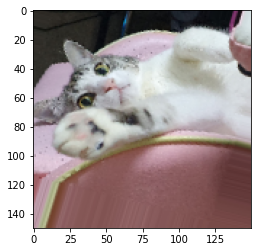

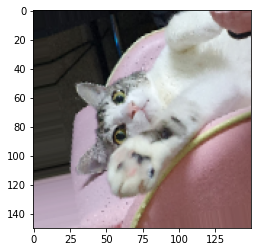

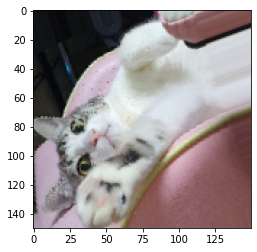

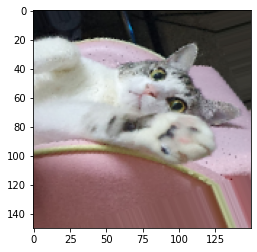

In [9]:
import matplotlib.pyplot as plt

img = image.load_img(fname[0], target_size=(150,150))

x = image.img_to_array(img)   # 이미지를 (150,150,3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # (1, 150,150,3) 크기로 재변환

i=0
for pic in gene.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(pic[0]))
  i+=1
  if i==4:
    break
plt.show()

In [11]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [12]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

val_gen = ImageDataGenerator(rescale=1./255) # 검증용은 증식하지 말고 리스케일만 진행

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size = (150,150), # 모든 이미지 크기를 150*150으로 변환
                                                batch_size = 20,
                                                class_mode = 'binary')   # 이진 분류이므로 바이너리 모드

val_generator = val_gen.flow_from_directory(val_dir,
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = mod.fit(train_generator,
                  batch_size=20,
                  epochs=100,
                  validation_data = val_generator)

Epoch 1/100
100/100 [==============================] - 133s 1s/step - loss: 0.6860 - acc: 0.6765 - val_loss: 0.5877 - val_acc: 0.6990
Epoch 2/100
100/100 [==============================] - 129s 1s/step - loss: 0.5773 - acc: 0.7025 - val_loss: 0.4971 - val_acc: 0.7500
Epoch 3/100
100/100 [==============================] - 126s 1s/step - loss: 0.5644 - acc: 0.7215 - val_loss: 0.5118 - val_acc: 0.7410
Epoch 4/100
100/100 [==============================] - 125s 1s/step - loss: 0.5366 - acc: 0.7230 - val_loss: 0.5006 - val_acc: 0.7570
Epoch 5/100
100/100 [==============================] - 125s 1s/step - loss: 0.5437 - acc: 0.7210 - val_loss: 0.5651 - val_acc: 0.7180
Epoch 6/100
100/100 [==============================] - 126s 1s/step - loss: 0.5313 - acc: 0.7320 - val_loss: 0.4901 - val_acc: 0.7580
Epoch 7/100
100/100 [==============================] - 126s 1s/step - loss: 0.5281 - acc: 0.7290 - val_loss: 0.4918 - val_acc: 0.7530
Epoch 8/100
100/100 [==============================] - 125s 1s

KeyboardInterrupt: ignored

In [ ]:
model.save('catdog2.h5')

In [ ]:
import matplotlib.pyplot as plt, numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = 100

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(np.arange(epoch), acc, color='mediumpurple', marker='o', label='Train Accuracy')
ax1.plot(np.arange(epoch), val_acc, color='tan', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(np.arange(epoch), loss, color='cornflowerblue', marker='o', label='Train Loss')
ax2.plot(np.arange(epoch), val_loss, color='lightcoral', marker='o', label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()